In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

# Classification - Класификация

### Какво е машинно обучение

Машинното обучение се занимава със създаването на алгоритми, които се учат от данни, така че програмите и системите да могат да изпълняват задачи без изричен набор от програмирани инструкции - например технологията за разпознаване на изображения често разчита на алгоритми за машинно обучение, които анализират огромен брой снимки.

### Контролирано и неконтролирано обучение
Има три различни стила на обучение в алгоритмите за машинно обучение:
1. Контролирано
2. Неконтролирано
3. Полу-контролирано обучение

Целта на **Контролираното обучение** е да приспособим модел, който свързва отговора(зависими променливи) с предикторите(независими променливи), с цел точно предсказване на отговора за бъдещи наблюдения или по-добро разбиране на връзката между отговора и предикторите. Много класически статистически методи за обучение като линейна регресия и логистична регресия, също така и по-модерни подходи като GAM, ускоряване и поддържане на машини за регресия на вектори, работят в контролираната област на обучение.

**Неконтролираното обучение** е малко по-предизвикателната задача, при която за всяко наблюдение i = 1, ..., n, ние наблюдаваме вектор на измервания xi, но няма свързан отговор yi. При неконтролираното обучение не може  да се побере модел на линейна регресия, тъй като няма променлива за отговор, която да се предскаже. В тази обстановка в някакъв смисъл работим на сляпо; ситуацията се нарича без надзор, тъй като ни липсва променлива за отговор, която може да контролира нашия анализ.

### Регресия

#### 1. Дефиниция:
    Регресията е статистически метод, използван във финансите, инвестициите и други дисциплини, който се опитва да определи силата и характера на връзката между една зависима променлива (обикновено обозначена с Y) и поредица от други променливи (известни като независими променливи X).

#### 2. Видове регресии:
    1. Ordinary Least Squares Regression (OLSR)
    2. Linear Regression
    3. Logistic Regression
    4. Stepwise Regression
    5. Multivariate Adaptive Regression Splines (MARS)
    6. Locally Estimated Scatterplot Smoothing (LOESS) 

### Класифицация
#### 1. Дефиниция:
    Техника, при която категоризираме данните в даден брой класове. Основната цел на проблема с класификацията е да се идентифицира категорията / класът, към който ще попадат нови данни.


#### 2. Кога се използва: 

    Променливите за отговор могат да се характеризират като количествени или качествени (също известни като категориини). Количествените променливи приемат числови стойности (доходи, височина на хората, цена на стока и др.). За разлика от количествените, качествените променливи приемат стойности в един от K различни класове или категории. Примерите за качествени променливи включват пола на човек (мъж или жена), марката на закупения продукт (марка A, B или C) и др. Когато имаме проблеми от количествен тип, считаме че те са свързани с проблеми с регресията, докато тези, включващи качествен отговор, често се отнасят за проблеми с класификацията. В много ситуации променливата за отговор е качествена. Например полът на човек е качествен, като приема стойности мъж или жена(дано да не ме съдят "европейците" ;)). В случай, че имаме проблем свързан със машинно обучение, в който променливата за отговор е качествена ще използваме класификация, за да категоризираме данните, които имаме и да можем да определим към кой клас ще попаднат нови данни, ако има такива.
    
    Ще демонстрирам какво означава отговорът да е от тип количествен или качествен като използвам измислен от мен мини дата сет
    

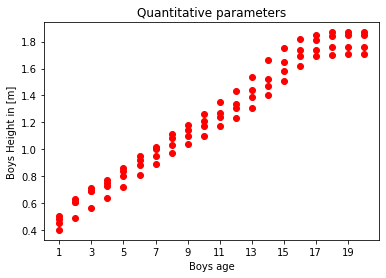

In [3]:
avg_boys_heights_in_uk = [0.48, 0.63, 0.71, 0.77, 0.86, 0Note.92, 1.0, 1.08, 1.14, 1.21, 1.27, 1.34, 1.44, 1.52, 1.65, 1.74, 1.81, 1.84, 1.85, 1.85]
avg_boys_heights_in_bg = [0.45, 0.61, 0.69, 0.73, 0.80, 0.88, 0.95, 1.03, 1.10, 1.17, 1.24, 1.31, 1.39, 1.47, 1.58, 1.69, 1.74, 1.76, 1.76, 1.76]
avg_boys_heights_in_nk = [0.40, 0.49, 0.56, 0.64, 0.72, 0.81, 0.89, 0.97, 1.04, 1.1, 1.17, 1.23, 1.31, 1.40, 1.51, 1.62, 1.69, 1.7, 1.71, 1.71]
avg_boys_heights_in_us = [0.50, 0.61, 0.69, 0.75, 0.84, 0.95, 1.02, 1.11, 1.18, 1.26, 1.35, 1.43, 1.54, 1.66, 1.75, 1.82, 1.85, 1.87, 1.87, 1.87]
plt.scatter([i for i in range(1, len(avg_boys_heights_in_uk) + 1)], avg_boys_heights_in_uk, color='r')
plt.scatter([i for i in range(1, len(avg_boys_heights_in_bg) + 1)], avg_boys_heights_in_bg, color='r')
plt.scatter([i for i in range(1, len(avg_boys_heights_in_nk) + 1)], avg_boys_heights_in_nk, color='r')
plt.scatter([i for i in range(1, len(avg_boys_heights_in_us) + 1)], avg_boys_heights_in_us, color='r')

plt.title("Quantitative parameters")
plt.xticks(range(1, 21, 2))
#plt.yticks()
plt.ylabel("Boys Height in [m]")
plt.xlabel("Boys age")
plt.show()

В този случай пазглеждаме **измислени** от мен данни за височината на момчета от 1 до 20 години в различни страни. В този случай търсената стойност (отговора) е количествен, а именно височината в метри. Следователно ако си пиша с момче на 14 години и не съм го виждал наживо, то от данните, с които разполагам мога да предположа, че височината му ще варира от 1.35 до 1.7. За да направя това предположение, не ми е нужна класификация, а регресия или по точно регресионни алгоритми.

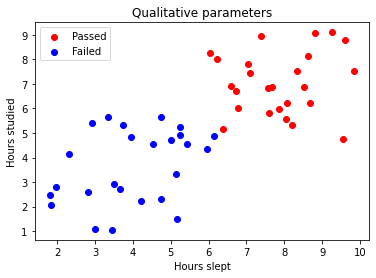

In [4]:
passed_exam_hours_studied = np.array((np.random.rand(1, 25) + 0.9) * 4.845)
passed_exam_hours_slept = np.array((np.random.rand(1, 25) + 1.3) * 4.45)
failed_exam_hours_studied = np.array((np.random.rand(1, 25) + 0.2) * 4.845)
failed_exam_hours_slept = np.array((np.random.rand(1, 25) + 0.4) * 4.45)
plt.scatter(passed_exam_hours_slept, passed_exam_hours_studied, color = 'r', label='Passed') 
plt.scatter(failed_exam_hours_slept, failed_exam_hours_studied, color = 'b', label='Failed') 

plt.ylabel("Hours studied")
plt.xlabel("Hours slept")
plt.legend()
plt.title("Qualitative parameters")
plt.show()

В този случай пазглеждаме **измислени** от мен данни за ученици като правата по OX показва колко часа са спали учениците преди контролно, а правата по OY показва колко часа са учили за контролното. Точките в червено са данните на учениците, които са минали контролното, а тези в синьо са данните на учениците, който са се провалили на контролното. Да кажем, че след една година, следващият випуск прави същото контролно. Ако знаем колко време са отделили новите ученици, то на базата на старите данни можем да предположим кои ще минат изпита и кои не. Следователно, ако Иванчо не е учил за теста и е спал нормално, то можем да кажем, че той ще бъде скъсан, докато Иванка, която е учила четири часа за изпита и е спала около седем часа ще вземе изпита. За да направя това предположение ми е нужна класификация, тъй като предположението (отговорът) ми е качествен (минал/скъсан). 

По какъв начин може да се формира класификацията, обаче? Втора точка отговаря на въпроса. Има много методи за класификация, ето някои от тях.

#### 2. Типове класификационни методи:
    1. Logistic Regression
    2. Naïve Bayes
    3. Stochastic Gradient Descent
    4. K-Nearest Neighbours
    5. Decision Tree
    6. Random Forest
    7. Support Vector Machine 

#### 3. Логистична регресия(формули и реализация):
Първо нека да започнем с определението за логистична регресия - Логистичната регресия е алгоритъм, който се използва за изчисляване на вероятността от възникване на няколко събития(обикновенно две(binary class...), но може и повече от две(multy-class)) и за справяне с въпросите на класификацията. Например прогнозиране дали входящият имейл е спам или не, или прогнозиране дали транзакцията с кредитна карта е измамна или не. В медицински контекст може да се използва логистична регресия, за да се предскаже дали туморът е доброкачествен или злокачествен.
​
    


**Сигмоидна функция(Sigmoid function)**

След като прочетем определението може да предположим, че по зададени променливи $X$ трябва да определим дали обекта принадлежи на клас 1 или клас 2. Следователно ще ни трябва някаква функция която да осъществява връзката междъ $X$ и $Y$.

Да кажем, че това е функцията( $ z = wx + b $ ), която връща стойности в интервала  
    $z \in [-\infty, +\infty]$. 

Проблемът е, че не искаме да имаме стойности извън интервала  $ [0, 1] $, защото имаме два класа - 0 за клас1 и 1 за клас 2. За да решим този проблем, на помощ идва сигмоидната функция, която връща стойности в интервала $ [0, 1] $ независимо какво ще и подадем като аргумент.

Следователно можем да подадем $ z $ като такъв аргумент.

$$ S(z) = \frac{1}{1 + e^{-z}} $$

където:
1. $ z = xw + b $

2. w - тежест на независимите променливи $X$

3. b - наклон на функцията


От тук нататък аз ще използвам формулата: $$ z = \theta^T \mathbf{x} $$

където

1. $ \theta $ е матрица от тежести w

2. $ \mathbf{x} $ е матрица от независимите променливи на уравнението
3. Размерът на двете матрици е едни и същ

Тъй като ги умножавам си позволявам да транспонирам матрицата от тежести.

##### Обобщение до тук:
От определението за регресия, накратко, можем да разберем, че ни трябва да намерим връзката между $ x $ и $y$. Следователно в нашия случай ще се опитаме да намерим възможно най-близкото решение на уравнението:
$$ y = \frac{1}{1 + e^{\theta^T \mathbf{x}}} $$

Тоест ако $y_i = 1$ (означаваме клас1 с $y = 0$ и клас2 с $y = 1$), трябва да получим възможно най-близкия резултат до 1, когато подадем на уравнението $ y_i = \frac{1}{1 + e^{\theta^T \mathbf{x_i}}} $ съответните $ \theta^T \mathbf{x_i} $ за $ y_i $.
    

#### Заключение
Трябва да намерим параметрите - $ \theta $ (стойностите на тежестите на всеки един от елементите на $ \mathbf{x} $) на модела, така че вероятността да се получи резултат, такъв какъвто имаме като информация от датасета, да е най-голяма. В този случай $y\space \epsilon \space[0, 1]$ като $ y = \frac{1}{1 + e^{\theta^T \mathbf{x}}} $.


Този процес ще наречем трениране на модела.

#### Как да намерим стойностите на $ \theta $
Проблем: Как да намеря параметрите - каква формула да ползвам.
Решение: MLE - Maximum Likelihood Estimation

##### Какво представлява MLE - Maximum Likelihood Estimation
Досега не споменах какво точно е $ y $. Да кажем, че имаме N на брой данни от дейтабейса. За всяка една променлива трябва да кажем към кой клас се отнася. Следователно си създаваме матрица със 0 и 1-ци, които съответно отговарят на това дали променливата i е от първия клас(0) или от втория клас(1). Пример: Ако отново разгледаме данните, които си измислих - Данни за ученици като правата по OX показва колко часа са спали учениците преди контролно, а правата по OY показва колко часа са учили за контролното. То трябва да направя матрица със размер - броя на учениците, в която да пише за всеки ученик дали е минал теста или е скъсан т.е. на всеки ред ще има 0 или 1.

В заключението по-горе споменах за вероятност. Време е да запишем тази вероятност като формула:
$$ P(Y\mid X;\theta) $$
където

1. Y - Матрицата от класифицирани променливи

2. X - Матрицата с променливите

3. $ \theta $ - Тежестите на променливите


MLE - Maximum Likelihood Estimation представлява максималната вероятност, при намиране на параметрите $ \theta $ и  извършване на сигмоидната функция върху зададения модел, да се получат резултати, такива каквито са и резултатите в Y. 

Формула:

$$ \hat{\theta}^{MLE} = arg\space max\space \prod^n_{i = 0}P(y_i\mid \mathbf{x_i};\theta) $$

Търсим maksimalnoto proizwedenie на всяка вероятност, за която ще се намери $y_i$ по подадени $ \mathbf{x_i} $

Вероятността $ P(y_i\mid \mathbf{x_i};\theta) $ можем да разгледаме като функцията - $ f(\theta_0 + \theta_1 x_{i_1} + \theta_2 x_{i_2} + \cdots + \theta_n x_{i_n})$ като стигаме до $ x_{i_n}$ взависимост от това, колко променливи имаме. Накратко функцията може да се запише като $ f(\theta^T \mathbf{x_i}) $.

Проблем: Не искаме $ f(\theta^T \mathbf{x_i})\space \epsilon \space[-\infty, +\infty]$. Трябва ни трансформация на  стойностите от $\space \epsilon \space[-\infty, +\infty]$ в стойностите $[0, 1]$.

Решение: Използваме сигмоидната функция. $ S(z):\space[-\infty, +\infty] \rightarrow [0, 1]$ където $ z = f(\theta^T \mathbf{x_i}) $.

Слведователно  $ P(y_i\mid \mathbf{x_i};\theta) = S(\theta^T \mathbf{x_i})$

Нека разделим MLE на класове т.е.:

$$ \hat{\theta}^{MLE} = arg\space max\space \prod^n_{i = 0}P(y_i\mid \mathbf{x_i};\theta) = max\space \prod^n_{i = 0}P(y_i = 1\mid \mathbf{x_i};\theta) \prod^n_{i = 0}P(y_i = 0\mid \mathbf{x_i};\theta)  $$

$$ \prod^n_{i = 0}P(y_i = 0\mid \mathbf{x_i};\theta) $$ е произведението на вероятностите на групата за обучение, която принадлежи към клас1. 

$$ \prod^n_{i = 0}P(y_i = 1\mid \mathbf{x_i};\theta) $$ е произведението на вероятностите на групата за обучение, която принадлежи към клас2. 

От Вероятност знаем, че  $ \overline p(x) = 1 - p(x) $

Следователно $$ \prod^n_{i = 0}P(y_i = 0\mid \mathbf{x_i};\theta) = \prod^n_{i = 0} 1- P(y_i = 1\mid \mathbf{x_i};\theta)$$

И знаем, че:
$$  P(y_i = 1\mid \mathbf{x_i};\theta) = S(\theta^T \mathbf{x_i})$$

Заместваме в MLE:
$$ L (\theta) = \hat{\theta}^{MLE}= max\space \prod^n_{i = 0}S(\theta^T \mathbf{x_i}) \prod^n_{i = 0}(
1 - S(\theta^T \mathbf{x_i}))$$

Проблемът тук е, че при вероятността при единия винаги ще е около 0, защото един обект може да бъде само в един от класовете. Следователно можем да изведем формулата така:

$$ L(\theta) = \hat{\theta}^{MLE}= max\space \prod^n_{i = 0}S(\theta^T \mathbf{x_i})^{y_i} * (
1 - S(\theta^T \mathbf{x_i}))^{(1 - y_i)} $$

Така, ако $ y_i = 1 $ изразът $ (1 - S(\theta^T \mathbf{x_i}))^{(1 - y_i)}$ става 1 т.е. не променя нищо.

И по същата логика, ако $ y_i = 0 $ изразът $ y_i = 0 $ става 1 т.е. не променя нищо.

Вместо умножение ще използваме събиране, защото е по бърза операция, но за тази цел ще се наложи да трансформираме израза малко:
$$ l(\theta) = \space \log(\prod^n_{i = 0} S(\theta^T \mathbf{x_i})^{y_i} + (1 - S(\theta^T \mathbf{x_i}))^{(1 - y_i)}) $$

Тъй като логаритмите имат свойството $ \log a^b = b\log a $. И още едно свойство  $ \log a+ \log b = \log ab $

Получаваме израза:
$$ l(\theta) = \space \sum^n_{i = 0}\log( S(\theta^T \mathbf{x_i})^{y_i}) + \log(1 - S(\theta^T \mathbf{x_i}))^{(1 - y_i)}) $$

$$ l(\theta) =max \space \sum^n_{i = 0}y_i\log( S(\theta^T \mathbf{x_i})) + (1 - y_i)\log(1 - S(\theta^T \mathbf{x_i})) $$

Отново ако $ y_i = 0 $ изразът $y_i\log( S(\theta^T \mathbf{x_i}))$ се унищожава. Същото важи и за $ y_i = 1 $.

Функцията, която изведохме се нарича MLL - Maximum Log Likelihood

Тъй като ще използваме Gradient Descent ще ми трябва минимум, а не максимум. Можем да обърнем MLL в NLL.

Като $NLL(\theta) = -l(\theta)$:
$$ NLL(\theta) = min \space \sum^n_{i = 0}y_i\log( S(\theta^T \mathbf{x_i})) + (1 - y_i)\log(1 - S(\theta^T \mathbf{x_i})) $$

За жалост не можем да определим движението на тази функция, затова ще разчитаме на оптимизиращ алгоритъм - Gradient Descent, който да намери локален минимум на функцията NLL. В локалния минимум загубите на NLL ще са най-малки т.е. прецизността на функцията ще е най-голяма.

#### Gradient Descent
Целта на оптимизиращия алгоритъм е да се променят стойностите на $ \theta $, че грешката, която NLL ще "остави" селд себе си да бъде възможно най-малка.

##### Как да намерим стойностите на $\theta$
Първо ще запишем случайни числа в $\theta$. Използвайки Gradient Descent числата ще се променят, така че загубите на NLL ще станат минимални.

Алгоритъмът ще изглежда по този начин:

                                                For m in range(M):
$$ \theta = \theta + \alpha\frac{\delta NLL}{\delta \theta^T}$$

като $\alpha$ e скорост на обучение. Обикновенно $\alpha = 0.01 $ или $\alpha = 0.05 $

Ще ни трябва да намерим производната на сигмоидната функция $ S(z) = \frac{1}{1 + e^{-z}} $

$$ \frac{d(S(z))}{dx} = \frac{d(\frac{1}{1 + e^{-z}})}{dx} = \frac{d(1 + e^{-z})^{-1}}{dx} $$

Ще напиша формули, които ще ни помогнат малко по-надолу в обясненията.

Полимиалното правило:
$$ \frac{d(f(z)^{a})}{dx} = a f(z)^{a - 1}\frac{d(f(z))}{dx} $$

Експонентното правило:
$$ \frac{dе^{z}}{dx} = e^z $$

Логаритмичното правило:
$$ \frac{d\log(z)}{dx} = \frac{1}{z} $$

Chain Rule(по-добре да не го превеждам):

$$ \frac{\delta A}{\delta x} = \frac{\delta A}{\delta y}* \frac{\delta y}{\delta x} $$

Да се върнем на производната на сигмоидната функция $ S(z) = \frac{1}{1 + e^{-z}} $

$$ \frac{d(1 + e^{-z})^{-1}}{dx} = (-1)(1 + e^{-z})^{-2}* \frac{d(1 + e^{-z})}{dx} $$

$$ (-1)(1 + e^{-z})^{-2}* \frac{d(1 + e^{-z})}{dx} = (-1)(1 + e^{-z})^{-2}(-e^{-z}) $$

$$ (-1)(1 + e^{-z})^{-2}(-e^{-z}) = \frac{e^{-z}}{(1 + e^{-z})^2} $$

$$ \frac{e^{-z}}{(1 + e^{-z})^2} = \frac{-1 + 1 + e^{-z}}{1 + e^{-z}} * \frac{1}{1 + e^{-z}} $$

$$ \frac{-1 + 1 + e^{-z}}{1 + e^{-z}} * \frac{1}{1 + e^{-z}} \Leftrightarrow S(z)(1 - S(z)) $$

Така изведохме формулата за първата произвопдна на сигмоидната функция:

$$ \frac{d(S(z))}{dx} = S(z)(1 - S(z)) $$

Нека разапишем израза $ \frac{\delta NLL}{\delta \theta^T} $

$$  \frac{\delta NLL}{\delta \theta^T} = \space \sum^n_{i = 0}y_i * \frac {\log( S(\theta^T \mathbf{x_i}))}{\delta( S(\theta^T \mathbf{x_i}))}* \frac{\delta( S(\theta^T \mathbf{x_i}))}{\delta \theta^T} + (1 - y_i) * \frac{\log(1 - S(\theta^T \mathbf{x_i}))}{\delta(1 - S(\theta^T \mathbf{x_i}))}* \frac{\delta(1 - S(\theta^T \mathbf{x_i}))}{\delta \theta^T} $$

Използвайки логаритмичното правило от по-доре:

$$  \frac{\delta NLL}{\delta \theta^T} = \space \sum^n_{i = 0}y_i * \frac {1}{ S(\theta^T \mathbf{x_i})}* \frac{\delta( S(\theta^T \mathbf{x_i}))}{\delta \theta^T} + (1 - y_i) * \frac{1}{(1 - S(\theta^T \mathbf{x_i}))}* \frac{\delta(1 - S(\theta^T \mathbf{x_i}))}{\delta \theta^T}  $$

Използвайки Chain Rule:

$$  \frac{\delta NLL}{\delta \theta^T} = \space \sum^n_{i = 0}y_i * \frac {1}{ S(\theta^T \mathbf{x_i})}* \frac{\delta( S(\theta^T \mathbf{x_i}))}{\delta \theta^T x_i} * \frac{\delta \theta^T x_i}{\delta \theta^T} + (1 - y_i) * \frac{1}{(1 - S(\theta^T \mathbf{x_i}))}* \frac{\delta(1 - S(\theta^T \mathbf{x_i}))}{\delta \theta^T x_i} * \frac{\delta \theta^T x_i}{\delta \theta^T}  $$

Използвайки формулата за първата произвопдна на сигмоидната функция:

$$  \frac{\delta NLL}{\delta \theta^T} = \space \sum^n_{i = 0}y_i * \frac {1}{ S(\theta^T \mathbf{x_i})}* S(\theta^T \mathbf{x_i}) * (1 - S(\theta^T \mathbf{x_i})) * x_i  + (1 - y_i) * (-1) * \frac{1}{(1 - S(\theta^T \mathbf{x_i}))} * S(\theta^T \mathbf{x_i}) * (1 - S(\theta^T \mathbf{x_i})) * x_i $$

Съкращаваме:

$$  \frac{\delta NLL}{\delta \theta^T} = \space \sum^n_{i = 0}y_i * (1 - S(\theta^T \mathbf{x_i})) * x_i  - (1 - y_i) * S(\theta^T \mathbf{x_i}) * x_i $$

Разкриваме скобите и съкращаваме:

$$  \frac{\delta NLL}{\delta \theta^T} = \space \sum^n_{i = 0}(y_i - S(\theta^T \mathbf{x_i}))x_i $$

Да се върнем към оптимизиращия метод:

                                                For m in range(M):
$$ \theta = \theta + \alpha \space \sum^n_{i = 0}(y_i - S(\theta^T \mathbf{x_i}))x_i $$

Така след М на брой операции ще получим крайните стойности за $\theta$

Следователно, когато тестваме данните:

Искаме да изчислим вероятността за $y$ да бъде от клас 1 т.е. $y = 1$

$$ P(y = 1\mid \mathbf{x})  = \frac{1}{1 + e^{-(\theta^T\mathbf{x})}}$$

y = 1 Ако $ P(y = 1\mid \mathbf{x}) \geq 0.5 $

y = 0 Ако $ P(y = 1\mid \mathbf{x}) < 0.5 $

### Прилагане на алгоритъма от нулата във вид на код

In [2]:
def sigmoid_function(z):
    return 1 / (1 + np.exp(-z))

### 14. Classification
## I am interested
In the previous exercises, we looked at a **regression model**. Another type of widely used models is **classification**. Regression outputs a continuous value while classification outputs one of several pre-defined classes. In the most simple way, the classes are only two. For example, if we want to detect whether there's a cat on an image, we can have two classes: "cat" and "non-cat".

Explore the problem of classification. Implement and document one algorithm. Apply it to some real-world data. You can use the following checklist:

**Note:** If your paper is **about the algorithm**, consider **writing it from scratch**, not reusing it from a library.

* What is supervised learning? What do supervised learning models do?
* What is regression? What is classification?
* What types of problems does classification solve directly? 143 > 
    * What types of problems can be reduced to classification?
* What's the difference between two-class and multi-class classification?
* Explore one algorithm for classification, e.g. logistic regression.
    * State the problem clearly
    * List all assumptions of the modelling function

    * Describe the process: distances, error function, total loss, gradient descent, etc.; as needed
    * Implement the algorithm from scratch
* Select or generate a small dataset, suitable for classification. Run your algorithm as a sanity check
* Debug and solve any problems
* Waht is a confusion matrix?
* What metrics are used to score a classifier?
    * Accuracy, Precision, Recall, others
    * ROC curve, interpretation
* Select a real dataset
    * Explore it to get acquainted with what information it contains
    * Clean up the data if you need to do so
    * Perform classification
    * Score your classification model
    * Use your classifier to predict
        * Split the data into training and testing set
        * Optionally, perform **cross-validation**
    * Compare your implementation to another one, e.g. `scikit-learn`. They should give the same (or very similar) results
    * Communicate the results on your dataset
    * Optionally, publish your model on the Internet as a Web API

Линкове, които използвах:

[Logistic regression](https://ml-cheatsheet.readthedocs.io/en/latest/logistic_regression.html)

[Natural logarithm](https://en.wikipedia.org/wiki/Natural_logarithm)

[What is machine learning](https://www.geeksforgeeks.org/ml-machine-learning/)

[What is machine learning](https://onlinestats.canr.udel.edu/machine-learning-vs-statistics/)

[What is ML]([links](https://www.geeksforgeeks.org/ml-machine-learning/))

[Introduction to statistical learning](https://people.unica.it/claudioconversano/files/2015/02/ISLR_print4.pdf)

[Linear regression](https://ml-cheatsheet.readthedocs.io/en/latest/linear_regression.html#multiple-linear-regression-predict)

[Elements of statistical learning](https://github.com/tpn/pdfs/blob/master/The%20Elements%20of%20Statistical%20Learning%20-%20Data%20Mining,%20Inference%20and%20Prediction%20-%202nd%20Edition%20(ESLII_print4).pdf)

[Logistic regression](https://towardsai.net/p/machine-learning/logistic-regression-with-mathematics)

[Много добър индиец:)](https://www.youtube.com/watch?v=uFfsSgQgerw)

[Cost function](https://www.bobbywlindsey.com/2019/11/06/understanding-maximum-likelihood-estimation/)

[logs and odds explanation](https://www.youtube.com/watch?v=ARfXDSkQf1Y)

[Very usefull video about logistic regression](https://www.youtube.com/watch?v=YMJtsYIp4kg)